# MATH 257/316 Python Assignment 3

* See [Python for UBC Math](https://ubcmath.github.io/python/) for an introduction to Python and Jupyter
* See [MATH 316 Jupyter Notebooks](https://ubcmath.github.io/MATH316/) to see more examples
* Run the tests to verify your solutions
* There are **hidden tests** therefore your solutions may not be entirely correct even if they pass the tests below
* Submit your `.ipynb` notebook file to Canvas (download from Syzygy to your machine and upload to Canvas)

In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy.integrate as spi
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
def animate(U,nframes,L=1,fps=20):
    fig,ax = plt.subplots()
    line, = plt.plot([],[])
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(U.min()*1.02,U.max()*1.02)
    ax.grid(True)
    K = U.shape[1]
    tstep = K//nframes
    x = np.linspace(0,L,U.shape[0])
    update = lambda k: line.set_data(x,U[:,k*tstep])
    ani = FuncAnimation(fig,update,frames=nframes,interval=1000/fps)
    plt.close()
    return ani

## Problem 1 (6 marks)

Consider the wave equation with homogeneous Dirichlet boundary conditions and no initial velocity:

$$
u_{tt} = u_{xx} \ , \ \ u(0,t) = u(L,t) = 0 \ , \ \ u(x,0) = f(x) \ , \ \ u_t(x,0) = 0
$$

The general solution is given by the Fourier series

$$
u(x,t) = \sum_{n=1}^{\infty} b_n \sin \left( \frac{n \pi x}{L} \right) \cos \left( \frac{n \pi t}{L} \right)
$$

where $b_n$ are the Fourier coefficients of the odd extension of $f(x)$ to $[-L,L]$

$$
f_{odd}(x) = \sum_{n=1}^{\infty} b_n \sin \left( \frac{n \pi x}{L} \right)
$$

**Part A.** Use the step function $u_{a,b}(x)$ from Assignment 2 to construct the odd extension of the function

$$
f(x) = x - x^4 \ , \ \ x \in [0,1]
$$

to the interval $[-1,1]$. Save the result as `f1odd`.

In [ ]:
# YOUR CODE HERE
u = lambda x,a,b: np.piecewise(x,[x < a,x >= a,x > b],[0,1,0])
f1odd= lambda x : -(-x-x**4)*u(x,-1,0) + (x-x**4)*u(x,0,1)

In [ ]:
# Test 1: Verify that f1odd is defined as a function. (1 mark)
assert callable(f1odd) == True ,  "f1odd should be a Python function."
print("Test 1: Success!")

Test 1: Success!


In [ ]:
# Test 2: Verify values of fodd. (1 mark)
assert np.allclose(f1odd(1/2),7/16) ,  "f1odd(1/2) should be 7/16."
assert np.allclose(f1odd(1),0) ,  "f1odd(1) should be 0."
assert np.allclose(f1odd(-1/2),-7/16) ,  "f1odd(1) should be -7/16."
print("Test 2: Success!")

Test 2: Success!


In [ ]:
# Test 3: Verify function fodd returns correct values. This cell contains hidden tests. (1 mark)

Plot the function `f1odd` to verify:

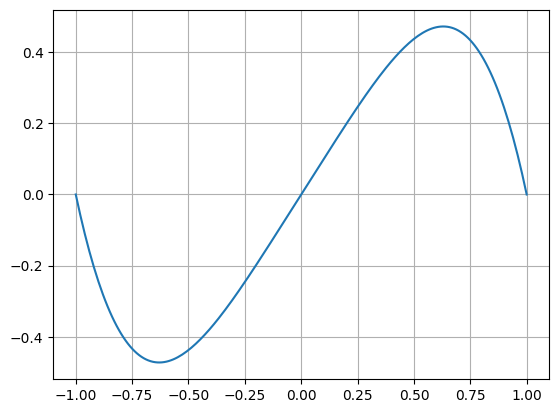

In [ ]:
x = np.linspace(-1,1,200)
y = f1odd(x)
plt.plot(x,y)
plt.grid(True)
plt.show()

**Part B.** Use the function `fourier` (see [MATH 316 > Fourier Series](https://ubcmath.github.io/MATH316/fourier.html#computing-coefficients)) to compute the Fourier coefficients of `f1odd` up to $N=5$. Since the function is odd, we expect `a0` and `a` to be all zeros. Save the coefficients as `b1`, `b2`, `b3`, `b4` and `b5`.

In [ ]:
def fourier(f,L,N):
    a = np.zeros(N)
    b = np.zeros(N)
    I,_ = spi.quad(f,-L,L)
    a0 = 1/L*I
    for n in range(1,N+1):
        integrand = lambda x: f(x)*np.cos(n*np.pi*x/L)
        I,_ = spi.quad(integrand,-L,L)
        a[n-1] = 1/L*I
        integrand = lambda x: f(x)*np.sin(n*np.pi*x/L)
        I,_ = spi.quad(integrand,-L,L)
        b[n-1] = 1/L*I
    return a0,a,b

In [ ]:
# YOUR CODE HERE
a0, a, b = fourier(f1odd, 1, 5)
b1 = b[0]
b2 = b[1]
b3 = b[2]
b4 = b[3]
b5 = b[4]

[ 0.46033152 -0.0967546   0.02737706 -0.01209433  0.00609191]


In [ ]:
# Test 1: Verify values are numbers. (1 mark)
assert b1 > 0 , "b1 is positive."
assert b2 < 0 , "b2 is negative."
assert b3 > 0 , "b3 is positive."
assert b4 < 0 , "b4 is negative."
assert b5 > 0 , "b5 is positive."
print("Test 1: Success!")

Test 1: Success!


In [ ]:
# Test 2: Verify first first and last entries. (1 mark)
assert np.round(b1,2) == .46 ,  "b1 rounded to 2 decimal places should be 0.46."
assert np.round(b5,3) == .006 ,  "b5 rounded to 3 decimal places should be 0.006."
print("Test 2: Success!")

Test 2: Success!


In [ ]:
# Test 3: Verify correct values. This cell contains hidden tests. (1 mark)

Plot the sine series with the function:

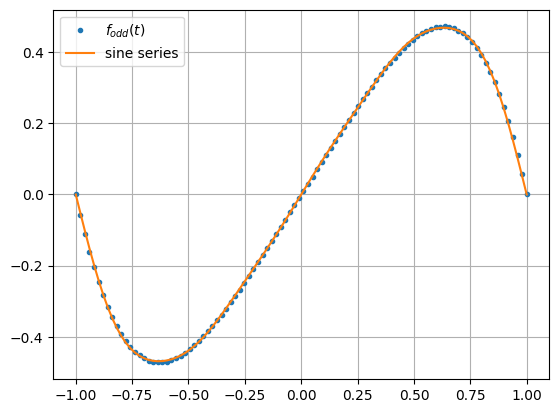

In [ ]:
x = np.linspace(-1,1,100)
y = f1odd(x)
s = b1*np.sin(np.pi*x) + b2*np.sin(2*np.pi*x) + b3*np.sin(3*np.pi*x) + b4*np.sin(4*np.pi*x) + b5*np.sin(5*np.pi*x)
plt.plot(x,y,'.',label='$f_{odd}(t)$')
plt.plot(x,s,label='sine series')
plt.grid(True), plt.legend()
plt.show()

Remove the `#` in the cell below to animate the solution of the wave equation:

In [ ]:
B = [b1,b2,b3,b4,b5]
u = lambda x,t: sum([B[n-1]*np.sin(n*np.pi*x)*np.cos(n*np.pi*t) for n in range(5)])

x = np.linspace(0,1,51)
t = np.linspace(0,10,1001)
X,T = np.meshgrid(x,t)
U = u(X,T).T

nframes = 200
ani = animate(U,nframes)
HTML(ani.to_html5_video())

## Problem 2 (4 marks)

Consider the equation

$$
u_{tt} = u_{xx} \ , \ \ u(0,t) = u(1,t) = 0 \ , \ \ u(x,0) = x - x^4 \ , \ \ u_t(x,0) = 0
$$

The function `wave` below implements the central-time-central-space (CTCS) finite difference method for the wave equation. See [MATH 316 Jupyter Notebooks > Wave Equation](https://ubcmath.github.io/MATH316/wave.html#ctcs-with-mixed-bcs).

In [ ]:
def wave(c,L,f,g,BCtype0,BC0,BCtypeL,BCL,tf,N,K):
    dx = L/N
    dt = tf/K
    r = c*dt/dx
    x = np.linspace(0,L,N+1)
    U = np.zeros((N+1,K+1))
    U[:,0] = f(x)
    A = np.zeros((N+1,N+1))
    q = np.zeros(N+1)
    G = g(x)

    if (BCtype0 not in ['D','N']) or (BCtypeL not in ['D','N']):
        raise Exception("Expecting boundary conditions of type 'D' or 'N'.")
    if BCtype0 == 'D':
        U[0,0] = BC0
        A[0,0] = 2.
        G[0] = 0.
    if BCtype0 == 'N':
        A[0,0] = 2*(1 - r**2)
        A[0,1] = 2*r**2
        q[0] = -2*r**2*dx*BC0
    if BCtypeL == 'D':
        U[N,0] = BCL
        A[N,N] = 2.
        G[N] = 0.
    if BCtypeL == 'N':
        A[N,N] = 2*(1 - r**2)
        A[N,N-1] = 2*r**2
        q[N] = 2*r**2*dx*BCL

    for n in range(1,N):
        A[n,n-1] = r**2
        A[n,n] = 2*(1 - r**2)
        A[n,n+1] = r**2

    U[:,1] = 1/2*A@U[:,0] + 1/2*q + dx*G
    for k in range(1,K):
        U[:,k+1] = A@U[:,k] - U[:,k-1] + q

    return U

Compute the finite difference approximation using $t_f=5$, $N=50$, $K=5000$. Save the result as `U2`.

In [ ]:
# YOUR CODE HERE
tf = 5
N = 50
K = 5000
f = lambda x : x - x ** 4
g = lambda x : np.zeros_like(x)
U2 = wave(c = 1, L = 1,f = f, g = g, BCtype0='D',BC0 = 0 , BCtypeL= 'D', BCL = 0 , tf = tf, N = N , K = K)

In [ ]:
# Test 1: Verify U2 is a NumPy array of size 51 by 5001. (1 mark)
assert isinstance(U2,np.ndarray) , "U2 should be a NumPy array."
assert U2.shape == (51,5001) , "U2 should be 51 by 5001."
print("Test 1: Success!")

Test 1: Success!


In [ ]:
# Test 2: Verify values of U2. (1 mark)
assert np.allclose(U2[0,0],0)
assert np.allclose(U2[25,0],7/16)
assert np.allclose(U2[-1,0],0)
assert np.allclose(U2[10,-1],-0.39216876433588327)
print("Test 2: Success!")

Test 2: Success!


In [ ]:
# Test 3: Verify U2 has correct values. This cell contains hidden tests. (2 marks)

Remove the `#` in the cell below to animate the solution:

In [ ]:
nframes = 200
ani = animate(U2,nframes)
HTML(ani.to_html5_video())

## Problem 3 (4 marks)

Consider the equation

$$
u_{tt} = u_{xx} \ , \ \ u_x(0,t) = 1 \ , \ \ u(1,t) = 0 \ , \ \ u(x,0) = x - x^4 \ , \ \ u_t(x,0) = 0.1(1 - x^2)
$$

Compute the finite difference approximation using $tf=10$, $N=50$, $K=8000$. Save the result as `U3`.

In [ ]:
# YOUR CODE HERE
tf = 10
N = 50
K = 8000
g = lambda x : 0.1*(1-x**2)

U3 = wave(c = 1, L = 1,f = f, g = g, BCtype0='N',BC0 = 1 , BCtypeL= 'D', BCL = 0 , tf = tf, N = N , K = K)

In [ ]:
# Test 1: Verify U3 is a NumPy array of size 51 by 8001. (1 mark)
assert isinstance(U3,np.ndarray) , "U3 should be a NumPy array."
assert U3.shape == (51,8001) , "U3 should be 51 by 8001."
print("Test 1: Success!")

Test 1: Success!


In [ ]:
# Test 2: Verify values of U3. (1 mark)
assert np.allclose(U3[0,0],0)
assert np.allclose(U3[25,0],7/16)
assert np.allclose(U3[-1,0],0)
assert np.allclose(U3[20,-1],-1.5739665440937018)
print("Test 2: Success!")

Test 2: Success!


In [ ]:
# Test 3: Verify U3 has correct values. This cell contains hidden tests. (2 marks)

Remove the `#` in the cell below to animate the result:

In [ ]:
nframes = 200
ani = animate(U3,nframes)
HTML(ani.to_html5_video())